### **DATA CLEANING**

In [265]:
merged_data = pd.read_csv('merged_movies.csv')
merged_data.head()

,primary_title,start_year,runtime_minutes,genres,vote_average,vote_count,Top Cast,Director,popularity,Budget,Revenue
0,#ALLMYMOVIES,2015,NaN,Documentary,9.0,4,Shia LaBeouf,Luke Turner,0.840,0.0,0
1,#Captured,2017,81.0,Thriller,3.2,6,"Lizze Gordon, Cody Renee Cameron, Eve Marlowe,...",Joe Homokay,1.418,0.0,0
2,#FollowFriday,2016,90.0,Thriller,3.2,7,"Courtney Lakin, Joseph Poliquin, Ashley Bratch...",Micho Rutare,1.646,0.0,0
3,#Horror,2015,101.0,"Crime,Drama,Horror",3.3,102,"Chloë Sevigny, Timothy Hutton, Natasha Lyonne,...",Tara Subkoff,6.099,1500000.0,0
4,#Lucky Number,2015,80.0,Comedy,6.0,2,"Tom Pelphrey, Natalie Hall, Method Man, Malcol...",Brendan Gabriel Murphy,0.919,1000000.0,0


In [236]:
merged_data.duplicated().sum()

0

In [237]:
merged_data.isna().sum()

,0
primary_title,0
start_year,0
runtime_minutes,633
genres,97
vote_average,0
vote_count,0
Top Cast,1125
Director,368
popularity,0
Budget,95


In [238]:
# Fill non numerical missing values with N/A
merged_data[['Director', 'Top Cast', 'genres']] = merged_data[['Director', 'Top Cast', 'genres']].fillna("N/A")

In [239]:
merged_data.isna().sum()

,0
primary_title,0
start_year,0
runtime_minutes,633
genres,0
vote_average,0
vote_count,0
Top Cast,0
Director,0
popularity,0
Budget,95


In [240]:
# Ensure columns for correlation are numeric
merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')
merged_data['popularity'] = pd.to_numeric(merged_data['popularity'], errors='coerce')
merged_data['vote_average'] = pd.to_numeric(merged_data['vote_average'], errors='coerce')

In [241]:
# Replace rows with 0 in the revenue and budget columns with null
merged_data['Revenue'] = merged_data['Revenue'].replace(0, np.nan)

In [242]:
merged_data['Budget'] = merged_data['Budget'].replace(0, np.nan)

In [243]:
merged_data.isna().sum()

,0
primary_title,0
start_year,0
runtime_minutes,633
genres,0
vote_average,0
vote_count,0
Top Cast,0
Director,0
popularity,0
Budget,11526


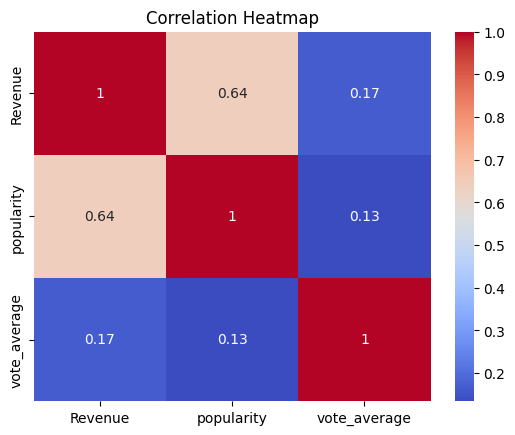

In [217]:
# Use correlation to establish the whether popularity can be used to predict revenue to fill missing values
numeric_features = merged_data[['Revenue', 'popularity', 'vote_average']]
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


As shown by the correlation matrix there is a strong positive correlation between a title's popularity and the revenue accrued (0.64). More popular movies may accrue higher revenues.

In [244]:
# Filling missing values in Revenue column based on popularity

# Ensure 'Revenue' and 'popularity' are numeric
merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')
merged_data['popularity'] = pd.to_numeric(merged_data['popularity'], errors='coerce')

# Filter non-missing data for training
non_missing = merged_data[merged_data['Revenue'].notna() & merged_data['popularity'].notna()]

# Prepare X and y for regression
X_train = non_missing[['popularity']].values  # Independent variable
y_train = non_missing['Revenue'].values  # Dependent variable

# Train-test split (optional, for model evaluation)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train_split, y_train_split)

# Predict missing Revenue values
missing = merged_data[merged_data['Revenue'].isna() & merged_data['popularity'].notna()]
X_missing = missing[['popularity']].values
predicted_revenue = regressor.predict(X_missing)

# Fill the missing Revenue values with predictions
merged_data.loc[merged_data['Revenue'].isna() & merged_data['popularity'].notna(), 'Revenue'] = predicted_revenue

merged_data.head()

,primary_title,start_year,runtime_minutes,genres,vote_average,vote_count,Top Cast,Director,popularity,Budget,Revenue
0,#ALLMYMOVIES,2015,NaN,Documentary,9.0,4,Shia LaBeouf,Luke Turner,0.840,NaN,-7.226549e+07
1,#Captured,2017,81.0,Thriller,3.2,6,"Lizze Gordon, Cody Renee Cameron, Eve Marlowe,...",Joe Homokay,1.418,NaN,-6.258784e+07
2,#FollowFriday,2016,90.0,Thriller,3.2,7,"Courtney Lakin, Joseph Poliquin, Ashley Bratch...",Micho Rutare,1.646,NaN,-5.877036e+07
3,#Horror,2015,101.0,"Crime,Drama,Horror",3.3,102,"Chloë Sevigny, Timothy Hutton, Natasha Lyonne,...",Tara Subkoff,6.099,1500000.0,1.578769e+07
4,#Lucky Number,2015,80.0,Comedy,6.0,2,"Tom Pelphrey, Natalie Hall, Method Man, Malcol...",Brendan Gabriel Murphy,0.919,1000000.0,-7.094276e+07


In [245]:
# Set minimum revenue to $0
merged_data['Revenue'] = merged_data['Revenue'].apply(lambda x: max(0, x))

In [246]:
merged_data.head()

,primary_title,start_year,runtime_minutes,genres,vote_average,vote_count,Top Cast,Director,popularity,Budget,Revenue
0,#ALLMYMOVIES,2015,NaN,Documentary,9.0,4,Shia LaBeouf,Luke Turner,0.840,NaN,0.000000e+00
1,#Captured,2017,81.0,Thriller,3.2,6,"Lizze Gordon, Cody Renee Cameron, Eve Marlowe,...",Joe Homokay,1.418,NaN,0.000000e+00
2,#FollowFriday,2016,90.0,Thriller,3.2,7,"Courtney Lakin, Joseph Poliquin, Ashley Bratch...",Micho Rutare,1.646,NaN,0.000000e+00
3,#Horror,2015,101.0,"Crime,Drama,Horror",3.3,102,"Chloë Sevigny, Timothy Hutton, Natasha Lyonne,...",Tara Subkoff,6.099,1500000.0,1.578769e+07
4,#Lucky Number,2015,80.0,Comedy,6.0,2,"Tom Pelphrey, Natalie Hall, Method Man, Malcol...",Brendan Gabriel Murphy,0.919,1000000.0,0.000000e+00


Filling budget in relation to average genre budgets

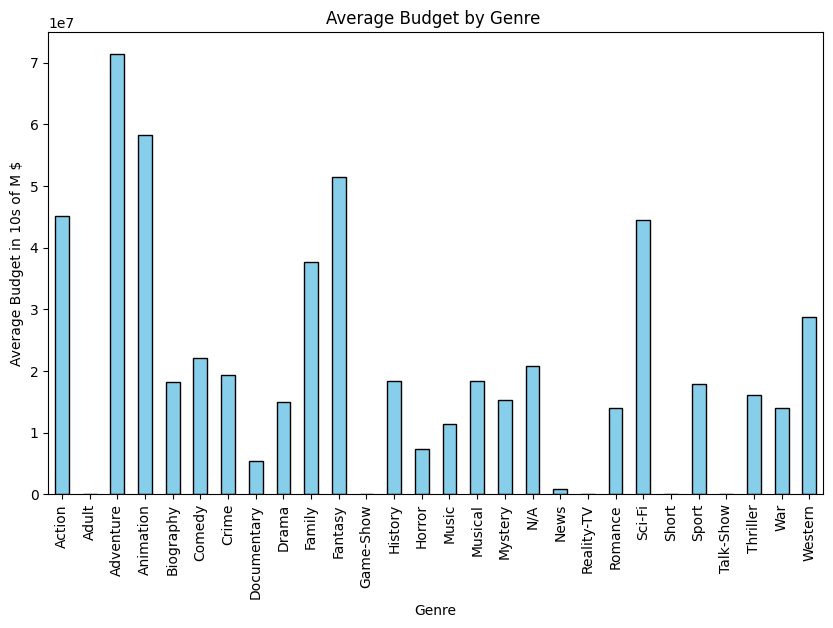

In [247]:
# Split the 'genres' column
merged_data['genres_list'] = merged_data['genres'].apply(lambda x: x.split(','))

# Explode the 'genres_list' to create one row per genre
exploded_data = merged_data.explode('genres_list')

# Group by genre and calculate the average budget for each genre
average_budget_by_genre = exploded_data.groupby('genres_list')['Budget'].mean()

# Plot the histogram of average budgets per genre
plt.figure(figsize=(10, 6))
average_budget_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Budget by Genre ")
plt.xlabel("Genre")
plt.ylabel("Average Budget in 10s of M $")
plt.xticks(rotation=90)
plt.show()

In [248]:
# Filling budget in relation to average genre budgets
print(average_budget_by_genre)

genres_list
Action         4.518054e+07
Adult          1.000000e+05
Adventure      7.136065e+07
Animation      5.833835e+07
Biography      1.812759e+07
Comedy         2.203588e+07
Crime          1.936473e+07
Documentary    5.438894e+06
Drama          1.493286e+07
Family         3.759392e+07
Fantasy        5.138186e+07
Game-Show               NaN
History        1.836532e+07
Horror         7.279750e+06
Music          1.138641e+07
Musical        1.830451e+07
Mystery        1.532842e+07
N/A            2.072649e+07
News           8.843300e+05
Reality-TV     1.000000e+02
Romance        1.399086e+07
Sci-Fi         4.449752e+07
Short                   NaN
Sport          1.792540e+07
Talk-Show               NaN
Thriller       1.606680e+07
War            1.401433e+07
Western        2.869241e+07
Name: Budget, dtype: float64


In [251]:
# Expand the genres into separate rows
expanded_genres = merged_data.assign(Genre=merged_data['genres'].str.split(',')).explode('genres')

# Calculate the average budget for each genre
genre_avg_budget = expanded_genres.groupby('genres')['Budget'].mean()

# Fill missing budget values
def fill_runtime(row):
    if pd.isna(row['Budget']):
        genres = row['genres'].split(',')
        genre_budget = [genre_avg_budget[genre] for genre in genres if genre in genre_avg_budget]
        # Calculate the mean of the available budget
        return np.mean(genre_budget) if genre_budget else np.nan
    else:
        return row['Budget']

merged_data['Budget'] = merged_data.apply(fill_runtime, axis=1)

In [252]:
merged_data['Budget'].isna().sum()

5

In [254]:
merged_data = merged_data.dropna(subset = ['Budget'])

In [255]:
merged_data.isna().sum()

,0
primary_title,0
start_year,0
runtime_minutes,632
genres,0
vote_average,0
vote_count,0
Top Cast,0
Director,0
popularity,0
Budget,0


Filling runtime based on genre

In [256]:
# Expand the genres into separate rows
expanded_genres = merged_data.assign(Genre=merged_data['genres'].str.split(',')).explode('genres')

# Calculate the average runtime for each genre
genre_avg_runtime = expanded_genres.groupby('genres')['runtime_minutes'].mean()

# Fill missing runtime values
def fill_runtime(row):
    if pd.isna(row['runtime_minutes']):
        genres = row['genres'].split(',')
        genre_runtimes = [genre_avg_runtime[genre] for genre in genres if genre in genre_avg_runtime]
        # Calculate the mean of the available runtimes
        return np.mean(genre_runtimes) if genre_runtimes else np.nan
    else:
        return row['runtime_minutes']

merged_data['runtime_minutes'] = merged_data.apply(fill_runtime, axis=1)

In [257]:
merged_data.isna().sum()

,0
primary_title,0
start_year,0
runtime_minutes,0
genres,0
vote_average,0
vote_count,0
Top Cast,0
Director,0
popularity,0
Budget,0
